**기초 프로젝트** __
18조 멍멍냥냥 이민준

# Golden State Warriors – 구단주 관점 분석

## 분석 목표
Golden State Warriors의 **구단 자산 가치, 투자 효율성, 브랜드 영향력, 수익 구조, 장기 성과 관리**를
데이터 기반으로 분석한다.

## 핵심 분석 영역 (2가지)
1. 팀 가치 및 영향력 평가  
   **시즌별 팀 랭킹 및 승률 추세 분석 (2003–2022)**  
   → 장기 성장 흐름과 성과의 일관성 평가

2. 홈 구장 기반 경쟁력 및 수익성 평가  
   **홈 어드밴티지 및 승리 요인 분석**  
   → 홈·원정 성적 격차와 주요 경기력 요인 비교

< 구단주 >

질문 : “어디에 투자해야 이 팀의 가치가 커지는가?”

분석 초점 : 장기 승률·랭킹 추세 & 홈 구장 경쟁력 &구조적 변화 여부

결과물 : 투자 방향 결정 & 자산 유지/교체 판단


**======================================================**

# 필요한 라이브러리 불러오기 및 환경 설정



In [2]:
# Golden State Warriors 데이터 분석
# (구단주 관점 분석용 기본 환경 설정)

# ======================================================
#1️. 데이터 처리 라이브러리
import pandas as pd              # 데이터프레임 처리 (CSV 로드, 집계, 정제)
import numpy as np               # 수치 연산 및 배열 처리

# ======================================================
#2. 시각화 라이브러리
import matplotlib.pyplot as plt  # 기본 그래프 시각화
import seaborn as sns            # 통계 기반 고급 시각화

# ======================================================
#3. 경고 메시지 제거
import warnings
warnings.filterwarnings('ignore') # 분석 과정에서 불필요한 경고 메시지를 숨겨 가독성 향상

# ======================================================
#4. Warriors 구단 브랜드 컬러 정의 (시각화 일관성 및 브랜드 아이덴티티 유지)
GSW_BLUE = '#1D428A'     # 골든스테이트 워리어스 블루
GSW_YELLOW = '#FFC72C'   # 골든스테이트 워리어스 옐로우
GSW_GRAY = '#26282A'     # 보조 색상 (다크 그레이)

# ======================================================
#5. 시각화 기본 설정
plt.rcParams['font.family'] = 'DejaVu Sans'  # 영문 폰트 설정
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지
sns.set_style("whitegrid")                   # 분석용 가독성 높은 그리드 스타일

# ======================================================
#6. 분석 시작 안내 메시지
print("Golden State Warriors - 구단주 관점 분석")

Golden State Warriors - 구단주 관점 분석


# 데이터 로드

## 필요한 CSV 파일:
* games.csv
* teams.csv
* ranking.csv

In [3]:
# CSV 파일 읽기
games = pd.read_csv('games.csv')        # 경기 데이터
teams = pd.read_csv('teams.csv')        # 팀 정보 데이터
ranking = pd.read_csv('ranking.csv')    # 랭킹 데이터

# 데이터 크기 출력
print(f"✓ games: {games.shape[0]:,}행 x {games.shape[1]}열")
print(f"✓ teams: {teams.shape[0]:,}행 x {teams.shape[1]}열")
print(f"✓ ranking: {ranking.shape[0]:,}행 x {ranking.shape[1]}열")

✓ games: 26,651행 x 21열
✓ teams: 30행 x 14열
✓ ranking: 210,342행 x 13열


## 데이터 전처리



## 필요로 하는 CSV 파일의 컬럼들

---

### 1️. teams.csv  
Golden State Warriors의 TEAM_ID 식별 및 구단 기본 정보 확인

**사용 컬럼**
- TEAM_ID  
- NICKNAME  
- CITY  
- ARENA  
- YEARFOUNDED  

**전처리**
- `NICKNAME == 'Warriors'` 조건으로 Warriors 행을 필터링함  
- 추출한 `TEAM_ID`를 이후 모든 데이터 분석의 기준 키로 사용함  

---

### 2️. games.csv  
Warriors 경기 데이터 추출 / 홈·원정 구분 / 승패 판정 /  
홈 어드밴티지 및 팀 스탯 분석

**사용 컬럼**
- GAME_ID  
- GAME_DATE_EST  
- HOME_TEAM_ID  
- VISITOR_TEAM_ID  
- PTS_home, PTS_away  
- AST_home, AST_away  
- REB_home, REB_away  
- FG_PCT_home, FG_PCT_away  
- FG3_PCT_home, FG3_PCT_away  
- FT_PCT_home, FT_PCT_away  

**생성한 파생변수**
- `IS_HOME`  
  - 해당 경기가 Warriors의 홈 경기인지 여부 (True / False)  
- `GSW_WIN`  
  - 홈/원정 여부를 고려한 Warriors의 승패 결과  
- `GSW_AST`, `GSW_REB`, `GSW_FG_PCT`, `GSW_FG3_PCT`, `GSW_FT_PCT`  
  - 홈/원정 기준으로 나뉜 컬럼을 Warriors 기준 팀 스탯으로 재구성  

**전처리**
- 날짜 컬럼(`GAME_DATE_EST`)을 `datetime` 형식으로 변환함  
- 홈/원정 기준 데이터를 Warriors 기준 구조로 재정렬함  

---

### 3️. ranking.csv  
시즌 단위 성과 집계 / 장기 승률 추이 분석 / 컨퍼런스 내 순위 계산

**사용 컬럼**
- TEAM_ID  
- SEASON_ID  
- STANDINGSDATE  
- W, L  
- W_PCT  
- CONFERENCE  

**생성한 파생변수**
- `SEASON_LABEL`  
  - 내부 시즌 코드(SEASON_ID)를 사람이 읽기 쉬운 형식으로 변환  
  - 예: `2015-16`  
- `CONF_RANK`  
  - 시즌별 서부 컨퍼런스 내 승률 기준 순위  

**전처리**
- `STANDINGSDATE`를 `datetime` 형식으로 변환함  
- `W_PCT`를 numeric 타입으로 변환함  
- 분석 대상 시즌을 2003–04 ~ 2022–23 시즌으로 제한함  
- 시즌 단위(`SEASON_ID`)로 groupby하여 승/패 합계 및 평균 승률을 계산함  


**전처리 단계:**
1. Warriors TEAM_ID 식별
2. 날짜 형식 변환
3. 홈/원정 경기 분리
4. Warriors 통계 계산
5. 날짜 -> 시즌 변환

In [4]:
# 데이터 전처리 1

# ======================================================
#1. Golden State Warriors 팀 식별
# teams 테이블에서 닉네임(NICKNAME)이 'Warriors'인 행만 선택
gsw_info = teams[teams['NICKNAME'] == 'Warriors']

# Warriors의 고유 TEAM_ID 추출
# → 이후 모든 경기·랭킹 데이터 필터링의 기준으로 사용
GSW_TEAM_ID = gsw_info['TEAM_ID'].values[0]

# ======================================================
# 2. Warriors 팀 기본 정보 출력 (검증용)
# TEAM_ID가 정확히 추출되었는지 확인하기 위해
# 팀의 기본 메타데이터를 함께 출력
print(f"\nGolden State Warriors")
print(f"  팀 ID: {GSW_TEAM_ID}")
print(f"  도시: {gsw_info['CITY'].values[0]}")
print(f"  홈 구장: {gsw_info['ARENA'].values[0]}")
print(f"  창단 연도: {gsw_info['YEARFOUNDED'].values[0]}")

# ======================================================
# 3. 날짜 및 수치형 컬럼 전처리
# 경기 날짜 컬럼을 문자열 → datetime 형식으로 변환
# → 연도별·시즌별 시계열 분석 가능
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])

# 랭킹 기준 날짜도 datetime 형식으로 변환
ranking['STANDINGSDATE'] = pd.to_datetime(ranking['STANDINGSDATE'])

# 승률(W_PCT)을 숫자형으로 변환
# 변환 불가 값은 NaN으로 처리하여 계산 오류 방지
ranking['W_PCT'] = pd.to_numeric(ranking['W_PCT'], errors='coerce')

# ======================================================
# 4. Warriors 경기 데이터 필터링
# 홈 팀 또는 원정 팀 중 하나라도
# Warriors인 모든 경기만 추출
gsw_games = games[
    (games['HOME_TEAM_ID'] == GSW_TEAM_ID) |
    (games['VISITOR_TEAM_ID'] == GSW_TEAM_ID)
].copy()

# ======================================================
# 5. 홈 / 원정 경기 구분 컬럼 생성
# Warriors 기준으로 홈 경기 여부 확인
# True  → 홈 경기
# False → 원정 경기
gsw_games['IS_HOME'] = gsw_games['HOME_TEAM_ID'] == GSW_TEAM_ID

# ======================================================
# 6. Warriors 기준 승/패 판정 컬럼 생성
# 홈 경기일 경우 : 홈 득점 > 원정 득점 → 승리
# 원정 경기일 경우 : 원정 득점 > 홈 득점 → 승리
gsw_games['GSW_WIN'] = np.where(
    gsw_games['IS_HOME'],
    gsw_games['PTS_home'] > gsw_games['PTS_away'],
    gsw_games['PTS_away'] > gsw_games['PTS_home']
)

# ======================================================
# 7. Warriors 주요 경기력 지표 컬럼 통합
# 홈/원정으로 나뉘어 있는 통계 컬럼을
# Warriors 기준 단일 컬럼으로 통합

# 생성 컬럼 예:
# - GSW_AST     : Warriors 어시스트
# - GSW_REB     : Warriors 리바운드
# - GSW_FG_PCT  : Warriors 필드골 성공률
# - GSW_FG3_PCT : Warriors 3점슛 성공률
# - GSW_FT_PCT  : Warriors 자유투 성공률
for stat in ['AST', 'REB', 'FG_PCT', 'FG3_PCT', 'FT_PCT']:
    gsw_games[f'GSW_{stat}'] = np.where(
        gsw_games['IS_HOME'],
        gsw_games[f'{stat}_home'],
        gsw_games[f'{stat}_away']
    )

# ======================================================
# 8. Warriors 랭킹 데이터 필터링
# ranking 테이블에서 Warriors의
# 시즌별 순위 및 승률 기록만 추출
gsw_ranking = ranking[ranking['TEAM_ID'] == GSW_TEAM_ID].copy()

# ======================================================
# 9. 시즌 ID를 사람이 읽기 쉬운 형식으로 변환하는 함수
def season_to_label(season_id):
    """
    SEASON_ID를 시즌 연도 형식으로 변환
    예) 22014 → 2014-15
    """
    year_start = int(str(season_id)[1:])
    year_end = year_start + 1
    return f"{year_start}-{str(year_end)[2:]}"

# ======================================================
# 10. 전처리 결과 요약 출력
print("\n시즌 형식: 22014 = 2014-15 시즌")
print(f"\n✓ Warriors 경기 수: {len(gsw_games):,}경기")
print(f"✓ Warriors 랭킹 기록 수: {len(gsw_ranking):,}개")


Golden State Warriors
  팀 ID: 1610612744
  도시: Golden State
  홈 구장: Chase Center
  창단 연도: 1946

시즌 형식: 22014 = 2014-15 시즌

✓ Warriors 경기 수: 1,823경기
✓ Warriors 랭킹 기록 수: 7,025개


In [5]:
# 데이터 전처리 2

# ======================================================
# 1. 시즌 단위 Warriors 성적 집계
# 경기 단위 랭킹 데이터를 시즌(SEASON_ID) 기준으로 집계하여
# '시즌별 성과 요약 테이블' 생성

# → 구단주 관점에서는
#   "한 시즌이 하나의 투자 결과 단위"가 됨
gsw_season = (
    gsw_ranking
    .groupby('SEASON_ID')
    .agg({
        'W': 'sum',            # 시즌 전체 승리 수
        'L': 'sum',            # 시즌 전체 패배 수
        'W_PCT': 'mean',       # 시즌 평균 승률
        'CONFERENCE': 'first'  # 소속 컨퍼런스
    })
    .reset_index()
    .sort_values('SEASON_ID')  # 시즌 시간 흐름 기준 정렬
)

# ======================================================
# 2. 분석 대상 시즌 필터링
# 장기 추세 분석을 위해
# 2003-04 시즌부터 2022-23 시즌까지로 범위 제한

# → 구단 가치의 장기 변화 확인 목적
gsw_season = gsw_season[
    (gsw_season['SEASON_ID'] >= 22003) &
    (gsw_season['SEASON_ID'] <= 22022)
].copy()

# ======================================================
# 3. 시즌 라벨 생성 (가독성 개선)
# 내부 코드 형태의 SEASON_ID를
# 사람이 읽기 쉬운 시즌 표기로 변환
# 예) 22014 → 2014-15
gsw_season['SEASON_LABEL'] = gsw_season['SEASON_ID'].apply(season_to_label)

# ======================================================
# 4. 서부 컨퍼런스 기준 시즌별 순위 계산
# Warriors는 서부 컨퍼런스 소속이므로
# 컨퍼런스 내 상대적 위치를 파악하는 것이 중요

# → 절대 승률이 아닌 '경쟁 환경 속 위치' 확인
west_ranking = ranking[ranking['CONFERENCE'] == 'West'].copy()

# 시즌(SEASON_ID)별로 승률(W_PCT) 기준 내림차순 정렬
# → 승률이 높을수록 상위 순위
west_ranking = west_ranking.sort_values(
    ['SEASON_ID', 'W_PCT'],
    ascending=[True, False]
)

# ======================================================
# 5. 시즌별 서부 컨퍼런스 순위 부여
# 시즌별 그룹 내에서 순서를 매겨
# 실제 컨퍼런스 순위(CONF_RANK) 생성

# cumcount(): 0부터 시작 → +1로 실제 순위로 변환
west_ranking['CONF_RANK'] = (
    west_ranking
    .groupby('SEASON_ID')
    .cumcount() + 1
)

# ======================================================
# 6. Warriors 시즌별 최종 컨퍼런스 순위 추출
# 서부 컨퍼런스 전체 팀 중
# Warriors 기록만 필터링

# 시즌별 첫 행 = 해당 시즌 Warriors의 최종 순위
gsw_ranks = (
    west_ranking[west_ranking['TEAM_ID'] == GSW_TEAM_ID]
    .groupby('SEASON_ID')
    .first()
)

# ======================================================
# 7. 시즌별 성적 테이블에 컨퍼런스 순위 병합
# 시즌 단위 성적 요약 테이블(gsw_season)에
# 서부 컨퍼런스 순위(CONF_RANK)를 결합

# → 각 시즌을 다음과 같이 해석 가능:
#   "이 시즌은 서부 몇 위 수준의 팀이었는가?"
gsw_season = gsw_season.merge(
    gsw_ranks[['CONF_RANK']],  # 필요한 컬럼만 선택
    left_on='SEASON_ID',       # 왼쪽 테이블 기준 키
    right_index=True,          # 오른쪽 테이블은 SEASON_ID가 인덱스
    how='left'                 # 일부 시즌 누락 시 NaN 유지
)

## 분석 1: **팀 가치 및 영향력 평가** - 장기 성장 흐름과 성과의 일관성 평가

**목표:** 시즌별 팀 랭킹 및 승률 추세 분석 (2003–2022)

**사용 컬럼:**
- `SEASON_ID`: 시즌 식별자
- `W_PCT`: 승률

**전처리:**
- 모든 시즌 선택

**시각화:**  라인 차트
- **선택 이유:**  추세 방향을 효과적으로 보여주기 위해

**인사이트:**
- 추세 기울기 (상승/하락/안정)
- 시즌별 변동성

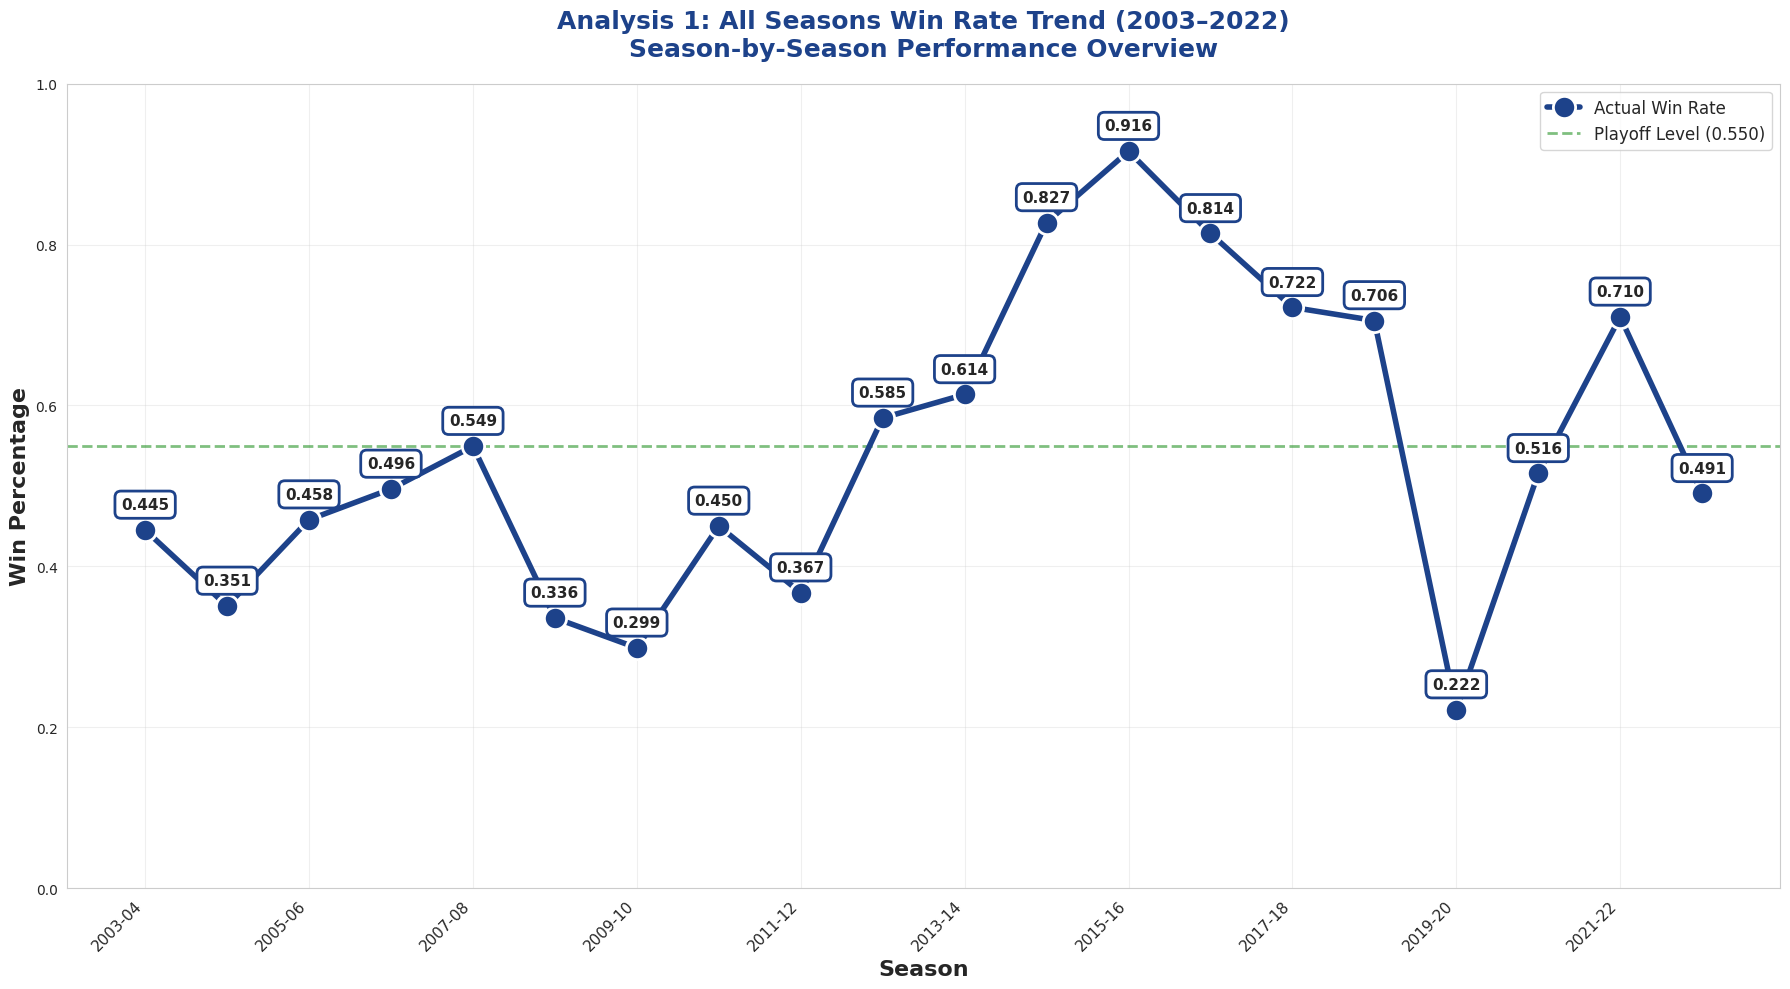


[그래프 설명]
  • X축: 시즌 - 전체 20개 시즌 (2003-04 ~ 2022-23)
  • Y축: 승률 (0.0 ~ 1.0)
  • 파란 실선: 시즌별 실제 승률
  • 녹색 점선: 플레이오프 기준 승률 (0.550)

[핵심 수치]
  • 평균 승률: 0.544
  • 변동성(표준편차): 0.191
  • 첫 시즌: 2003-04 - 0.445
  • 최근 시즌: 2022-23 - 0.491

[해석]
  → 본 그래프는 Warriors의 장기 성과 흐름을 통해
    구단 경쟁력의 유지 여부와 성과 변동성을
    구단주 관점에서 직관적으로 확인하기 위한 분석이다.


In [6]:
# 분석 1

# ======================================================
# 1. 전체 시즌 데이터 준비 (2003–2022)
# 시즌 단위로 집계된 Warriors 성적 데이터를 사용
# → 각 시즌을 하나의 '경영 성과 단위'로 간주
recent_all = gsw_season.copy()            # 모든 시즌 선택 (2003-04 ~ 2022-23)
recent_all = recent_all.reset_index(drop=True)
# 인덱스를 0부터 재설정하여 시계열 표현에 사용

# ======================================================
# 2. 시각화를 위한 X, Y 데이터 정의
# X값: 시즌의 순서를 나타내는 인덱스 (시간 흐름)
x = range(len(recent_all))

# Y값: 시즌별 승률
# → 구단의 경쟁력 및 성과 수준을 대표하는 핵심 지표
y = recent_all['W_PCT'].values

# ======================================================
# 3. 그래프 객체 생성
# 시즌 수가 많기 때문에 넓은 캔버스를 사용하여 가독성 확보
fig, ax = plt.subplots(figsize=(18, 10))

# ======================================================
# 4. 시즌별 실제 승률 추이 시각화
# 선 + 마커 그래프를 사용하여
# 시즌 간 성과 변화 흐름을 직관적으로 표현
ax.plot(
    x, y,
    'o-',
    linewidth=4,
    markersize=16,
    color=GSW_BLUE,              # Warriors 대표 색상
    label='Actual Win Rate',
    markeredgewidth=2,
    markeredgecolor='white',
    zorder=3                     # 가장 위 레이어에 표시
)

# ======================================================
# 5. 각 시즌의 승률 수치 직접 표시
# 단순 추세뿐 아니라,
# 각 시즌의 정확한 성과 수준을 함께 전달하기 위함
for i, val in enumerate(y):
    ax.annotate(
        f'{val:.3f}',            # 소수점 셋째 자리까지 표시
        xy=(i, val),             # 실제 데이터 위치
        xytext=(0, 15),          # 점 위로 15픽셀 이동
        textcoords='offset points',
        ha='center',
        fontsize=11,
        fontweight='bold',
        bbox=dict(
            boxstyle='round,pad=0.4',
            facecolor='white',
            edgecolor=GSW_BLUE,
            linewidth=2
        )
    )

# ======================================================
# 6. 플레이오프 기준선 표시
# 승률 0.550은 약 45승에 해당하며,
# NBA에서 경험적으로 '플레이오프 안정권'으로
# 간주되는 최소 성과 기준선
#
# → 구단주 관점에서는
#   "이 선 위에 있으면 수익·브랜드 가치가 유지되는 시즌"
ax.axhline(
    0.550,
    color='green',
    linestyle='--',
    linewidth=2,
    alpha=0.5,
    label='Playoff Level (0.550)'
)

# ======================================================
# 7. 축 라벨 및 그래프 제목 설정
ax.set_xlabel('Season', fontsize=16, fontweight='bold')
ax.set_ylabel('Win Percentage', fontsize=16, fontweight='bold')

# 장기 성과 흐름을 강조하는 제목
ax.set_title(
    'Analysis 1: All Seasons Win Rate Trend (2003–2022)\n'
    'Season-by-Season Performance Overview',
    fontsize=18,
    fontweight='bold',
    pad=20,
    color=GSW_BLUE
)

# ======================================================
# 8. X축 시즌 라벨 정리
# 시즌 수가 많아 과도한 라벨 중첩을 방지
# → 최대 약 10개 시즌만 표시
step = max(1, len(recent_all) // 10)

ax.set_xticks(range(0, len(recent_all), step))
ax.set_xticklabels(
    [recent_all['SEASON_LABEL'].iloc[i]
     for i in range(0, len(recent_all), step)],
    rotation=45,
    ha='right',
    fontsize=11
)

# ======================================================
# 9. 기타 시각 요소 설정
ax.legend(loc='best', fontsize=12)   # 범례 자동 배치
ax.grid(True, alpha=0.3)             # 보조선 표시
ax.set_ylim(0, 1)                    # 승률 범위 고정 (0~1)

# ======================================================
# 10. 그래프 출력
plt.tight_layout()   # 서브플롯·라벨 겹침 방지를 위한 레이아웃 자동 조정
plt.show()           # 그래프 화면 출력

# ======================================================
# 11. 기초 인사이트 지표 계산
# 시즌별 승률의 표준편차
# → 성과의 일관성(안정성) 지표
volatility = recent_all['W_PCT'].std()

# ======================================================
# 전체 기간 평균 승률
# → 장기적인 팀 경쟁력 수준
avg_winrate = recent_all['W_PCT'].mean()

# ======================================================
# 12. 분석 결과 요약 출력
print("\n[그래프 설명]")
print(f"  • X축: 시즌 - 전체 {len(recent_all)}개 시즌 (2003-04 ~ 2022-23)")
print("  • Y축: 승률 (0.0 ~ 1.0)")
print("  • 파란 실선: 시즌별 실제 승률")
print("  • 녹색 점선: 플레이오프 기준 승률 (0.550)")
print("\n[핵심 수치]")
print(f"  • 평균 승률: {avg_winrate:.3f}")
print(f"  • 변동성(표준편차): {volatility:.3f}")
print(f"  • 첫 시즌: {recent_all.iloc[0]['SEASON_LABEL']} - {recent_all.iloc[0]['W_PCT']:.3f}")
print(f"  • 최근 시즌: {recent_all.iloc[-1]['SEASON_LABEL']} - {recent_all.iloc[-1]['W_PCT']:.3f}")
print("\n[해석]")
print(
    "  → 본 그래프는 Warriors의 장기 성과 흐름을 통해\n"
    "    구단 경쟁력의 유지 여부와 성과 변동성을\n"
    "    구단주 관점에서 직관적으로 확인하기 위한 분석이다."
)

## 분석 2 : 홈 어드밴티지 및 승리 요인

**목표:** 홈 구장 수익성과 핵심 성공 요인 분석

**사용 컬럼:**
- `IS_HOME`: 홈/원정 구분자
- `GSW_WIN`: 승/패
- `GSW_AST`: 어시스트
- `GSW_REB`: 리바운드
- `GSW_FG_PCT`: 필드골 성공률
- `GSW_FG3_PCT`: 3점슛 성공률
- `GSW_FT_PCT`: 자유투 성공률

**전처리:**
- 홈/원정 경기 분리
- 홈 vs 원정 승률 계산
- 승리 요인 상관관계 분석

**시각화:**
- Part A: 홈/원정 승률 비교 파이 차트
- Part B: 상관계수를 보여주는 막대 차트

**선택 이유:** 파이 차트는 승/패 분포를 명확히 보여주고, 막대 차트는 요인의 중요도 순위를 표시

**인사이트:**
- 홈 어드밴티지 크기
- 승리를 위한 핵심 통계
- 투자 우선순위

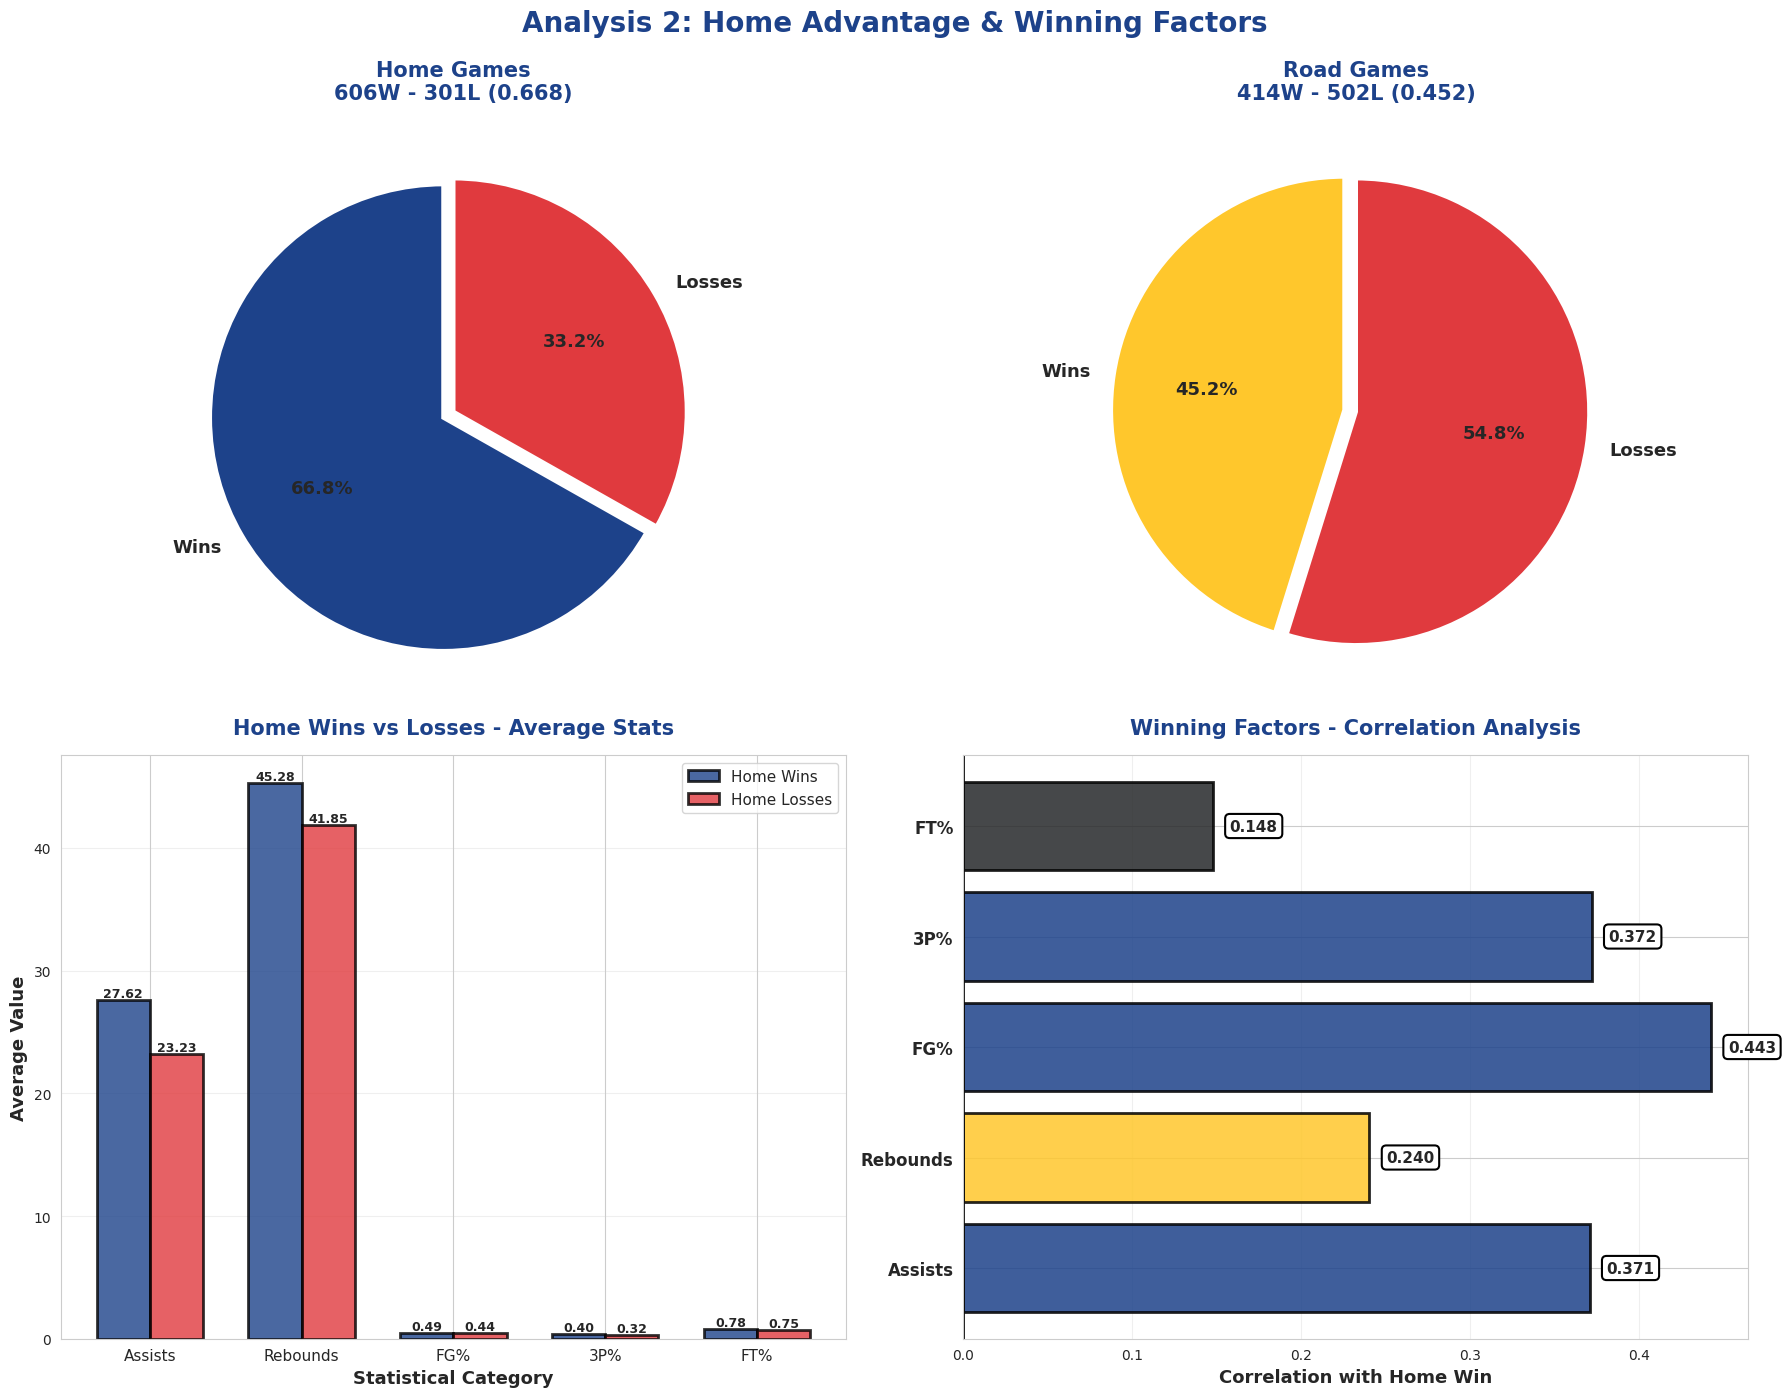


[그래프 설명]
  • 좌상: 홈 경기 승/패 비율
  • 우상: 원정 경기 승/패 비율
  • 좌하: 홈 승리 vs 패배 시 평균 경기력
  • 우하: 홈 승리 요인 상관관계
  • Assists: 어시스트 (팀 플레이 지표)
  • Rebounds: 리바운드 (에너지·피지컬)
  • FG: 필드골 성공률 (공격 효율)
  • FG3: 3점 성공률 (현대 농구 핵심)
  • FT: 자유투 성공률 (안정성)

[핵심 발견]
  • 홈 승률: 0.668 (606승-301패)
  • 원정 승률: 0.452 (414승-502패)
  • 홈 어드밴티지: +0.216

  • 최우선 승리 요인: FG% (상관계수: 0.443)

[승리 요인 순위]
  1. FG%: 0.443
  2. 3P%: 0.372
  3. Assists: 0.371
  4. Rebounds: 0.240
  5. FT%: 0.148

[투자 우선순위]
  1순위: FG% 강화
  2순위: 3P% 보완
  3순위: Assists 관리


In [7]:
# 1. 홈 / 원정 경기 분리
# Warriors 경기 데이터를 홈 경기와 원정 경기로 분리
# → 홈 구장이 실제 경쟁 우위(자산 가치)를 가지는지 확인
gsw_home = gsw_games[gsw_games['IS_HOME'] == True]    # 홈 경기만 필터링
gsw_away = gsw_games[gsw_games['IS_HOME'] == False]   # 원정 경기만 필터링

# 2. 홈 / 원정 승률 계산
# 승률 = 승리 여부(True=1)의 평균
home_wr = gsw_home['GSW_WIN'].mean()   # 홈 경기 승률
away_wr = gsw_away['GSW_WIN'].mean()   # 원정 경기 승률

# 홈 어드밴티지 계산
# → 홈 승률이 원정보다 얼마나 높은지
home_advantage = home_wr - away_wr

# 3. 홈 / 원정 승패 수 계산
# 파이 차트 시각화를 위한 승/패 개수 산출
home_w = gsw_home['GSW_WIN'].sum()        # 홈 경기 승수
home_l = len(gsw_home) - home_w           # 홈 경기 패수
away_w = gsw_away['GSW_WIN'].sum()        # 원정 경기 승수
away_l = len(gsw_away) - away_w           # 원정 경기 패수

# 4. 홈 경기 기준 승리 / 패배 데이터 분리
# 홈 경기에서 '이긴 경기'와 '진 경기'를 분리하여
# 어떤 경기력 요소가 승리를 만드는지 분석
gsw_home_wins = gsw_home[gsw_home['GSW_WIN'] == True]
gsw_home_losses = gsw_home[gsw_home['GSW_WIN'] == False]

# 5. 분석 대상 통계 컬럼 정의
# Warriors 기준 주요 경기력 지표
# → 단장·감독 관점의 지표를 구단주 의사결정에 연결
stats_cols = [
    'GSW_AST',      # 어시스트 (팀 플레이 지표)
    'GSW_REB',      # 리바운드 (에너지·피지컬)
    'GSW_FG_PCT',   # 필드골 성공률 (공격 효율)
    'GSW_FG3_PCT',  # 3점 성공률 (현대 농구 핵심)
    'GSW_FT_PCT'    # 자유투 성공률 (안정성)
]

# 홈 경기 승리 시 평균 경기력
win_stats = gsw_home_wins[stats_cols].mean()

# 홈 경기 패배 시 평균 경기력
loss_stats = gsw_home_losses[stats_cols].mean()

# 6. 홈 경기 기준 승리 요인 상관관계 분석
# 승/패(GSW_WIN)와 각 경기력 지표 간의 상관관계 계산
# → "홈에서 이기기 위해 가장 중요한 요소는 무엇인가?"
gsw_home_copy = gsw_home[['GSW_WIN'] + stats_cols].copy()

# Boolean(True/False)을 1/0으로 변환
gsw_home_copy['GSW_WIN'] = gsw_home_copy['GSW_WIN'].astype(int)

# 승리와의 상관계수 계산
correlations = gsw_home_copy.corr()['GSW_WIN'].drop('GSW_WIN')

# 그래프 가독성을 위한 인덱스 이름 변경
correlations.index = ['Assists', 'Rebounds', 'FG%', '3P%', 'FT%']

# 7. 시각화 설정 (2x2 서브플롯)
# 하나의 화면에서
# 홈/원정 성과 + 승리 요인을 동시에 보여주기 위함
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# 7-A. 홈 경기 승/패 비율 (파이 차트)
colors1 = [GSW_BLUE, '#E03A3E']   # 파란색: 승리, 빨간색: 패배
explode1 = (0.05, 0)              # 승리 비중 강조
ax1.pie(
    [home_w, home_l],
    labels=['Wins', 'Losses'],
    autopct='%1.1f%%',
    colors=colors1,
    startangle=90,
    explode=explode1,
    textprops={'fontsize': 13, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 3}
)
ax1.set_title(
    f'Home Games\n{home_w}W - {home_l}L ({home_wr:.3f})',
    fontsize=15,
    fontweight='bold',
    pad=15,
    color=GSW_BLUE
)

# 7-B. 원정 경기 승/패 비율 (파이 차트)
colors2 = [GSW_YELLOW, '#E03A3E']  # 노란색: 승리, 빨간색: 패배
ax2.pie(
    [away_w, away_l],
    labels=['Wins', 'Losses'],
    autopct='%1.1f%%',
    colors=colors2,
    startangle=90,
    explode=explode1,
    textprops={'fontsize': 13, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 3}
)
ax2.set_title(
    f'Road Games\n{away_w}W - {away_l}L ({away_wr:.3f})',
    fontsize=15,
    fontweight='bold',
    pad=15,
    color=GSW_BLUE
)

# 7-C. 홈 경기 승리 vs 패배 시 경기력 비교
# 어떤 스탯이 승리 경기에서 더 높게 나타나는지 비교
x = np.arange(len(stats_cols))
width = 0.35
labels = ['Assists', 'Rebounds', 'FG%', '3P%', 'FT%']

bars1 = ax3.bar(
    x - width/2,
    win_stats.values,
    width,
    label='Home Wins',
    color=GSW_BLUE,
    alpha=0.8,
    edgecolor='black',
    linewidth=2
)

bars2 = ax3.bar(
    x + width/2,
    loss_stats.values,
    width,
    label='Home Losses',
    color='#E03A3E',
    alpha=0.8,
    edgecolor='black',
    linewidth=2
)

# 각 막대 위에 수치 표시
for bars in [bars1, bars2]:
    for bar in bars:
        h = bar.get_height()
        ax3.text(
            bar.get_x() + bar.get_width()/2.,
            h,
            f'{h:.2f}',
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

ax3.set_xlabel('Statistical Category', fontsize=13, fontweight='bold')
ax3.set_ylabel('Average Value', fontsize=13, fontweight='bold')
ax3.set_title(
    'Home Wins vs Losses - Average Stats',
    fontsize=15,
    fontweight='bold',
    pad=15,
    color=GSW_BLUE
)
ax3.set_xticks(x)
ax3.set_xticklabels(labels, fontsize=11)
ax3.legend(loc='upper right', fontsize=11)
ax3.grid(True, alpha=0.3, axis='y')

# 7-D. 승리 요인 상관관계 시각화
# 상관계수 크기에 따라 색상 차등 적용
colors_corr = [
    GSW_BLUE if v > 0.25 else
    GSW_YELLOW if v > 0.15 else
    GSW_GRAY
    for v in correlations.values
]

bars_corr = ax4.barh(
    range(len(correlations)),
    correlations.values,
    color=colors_corr,
    alpha=0.85,
    edgecolor='black',
    linewidth=2
)

ax4.set_yticks(range(len(correlations)))
ax4.set_yticklabels(
    correlations.index,
    fontsize=12,
    fontweight='bold'
)
ax4.set_xlabel(
    'Correlation with Home Win',
    fontsize=13,
    fontweight='bold'
)
ax4.set_title(
    'Winning Factors - Correlation Analysis',
    fontsize=15,
    fontweight='bold',
    pad=15,
    color=GSW_BLUE
)
ax4.axvline(0, color='black', linestyle='-', linewidth=2)
ax4.grid(True, alpha=0.3, axis='x')

# 각 막대 끝에 상관계수 값 표시
for i, (bar, v) in enumerate(zip(bars_corr, correlations.values)):
    ax4.text(
        v + 0.01,
        i,
        f'{v:.3f}',
        va='center',
        ha='left',
        fontsize=11,
        fontweight='bold',
        bbox=dict(
            boxstyle='round,pad=0.3',
            facecolor='white',
            edgecolor='black',
            linewidth=1.5
        )
    )

# 8. 전체 그래프 제목 및 출력
plt.suptitle(
    'Analysis 2: Home Advantage & Winning Factors',
    fontsize=20,
    fontweight='bold',
    y=0.995,
    color=GSW_BLUE
)
plt.tight_layout()   # 서브플롯·라벨 겹침 방지를 위한 레이아웃 자동 조정
plt.show()           # 그래프 화면 출력

# 9. 핵심 인사이트 도출
# 홈 승리에 가장 큰 영향을 미친 요인
top_factor = correlations.idxmax()
top_corr = correlations.max()

# 10. 분석 결과 요약 출력
print("\n[그래프 설명]")
print("  • 좌상: 홈 경기 승/패 비율")
print("  • 우상: 원정 경기 승/패 비율")
print("  • 좌하: 홈 승리 vs 패배 시 평균 경기력")
print("  • 우하: 홈 승리 요인 상관관계")
print("  • Assists: 어시스트 (팀 플레이 지표)")
print("  • Rebounds: 리바운드 (에너지·피지컬)")
print("  • FG: 필드골 성공률 (공격 효율)")
print("  • FG3: 3점 성공률 (현대 농구 핵심)")
print("  • FT: 자유투 성공률 (안정성)")

print("\n[핵심 발견]")
print(f"  • 홈 승률: {home_wr:.3f} ({home_w}승-{home_l}패)")
print(f"  • 원정 승률: {away_wr:.3f} ({away_w}승-{away_l}패)")
print(f"  • 홈 어드밴티지: {home_advantage:+.3f}")
print(f"\n  • 최우선 승리 요인: {top_factor} (상관계수: {top_corr:.3f})")

print("\n[승리 요인 순위]")
for i, (factor, corr) in enumerate(
    correlations.sort_values(ascending=False).items(), 1
):
    print(f"  {i}. {factor}: {corr:.3f}")

print("\n[투자 우선순위]")
print(f"  1순위: {top_factor} 강화")
print(f"  2순위: {correlations.sort_values(ascending=False).index[1]} 보완")
print(f"  3순위: {correlations.sort_values(ascending=False).index[2]} 관리")

**======================================================**

**인사이트 및 결론? ( 미완성 )**


작성중입니다!!

**======================================================**

아래 코드는 일단 코랩에서 시각화된 것을 PDF로 보여주기위한 추가 코드입니다! 프로젝트와는 무관한 코드입니당

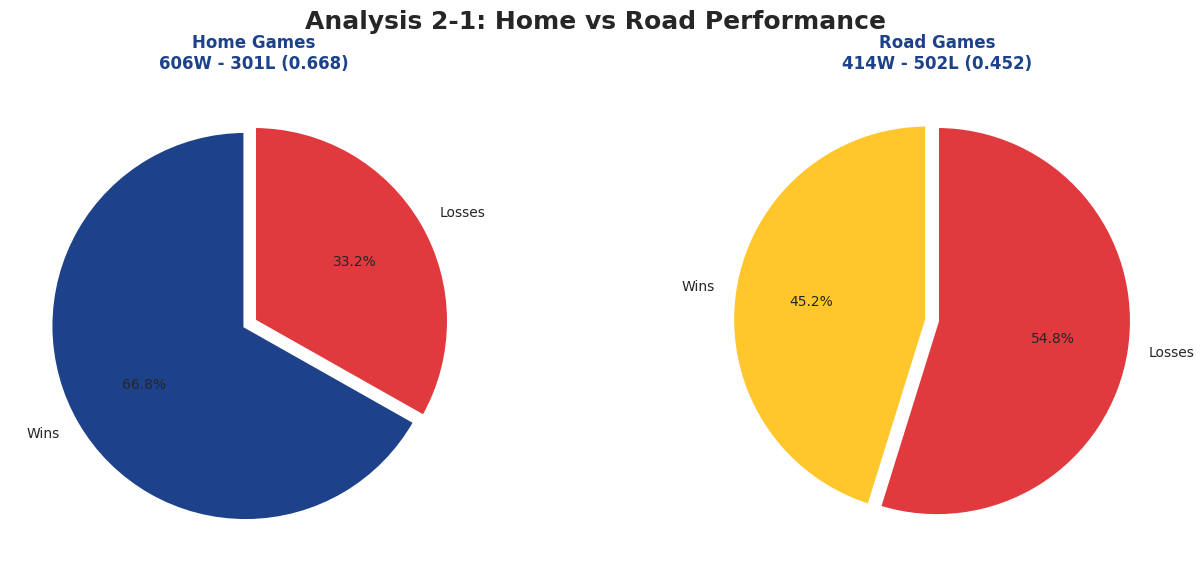

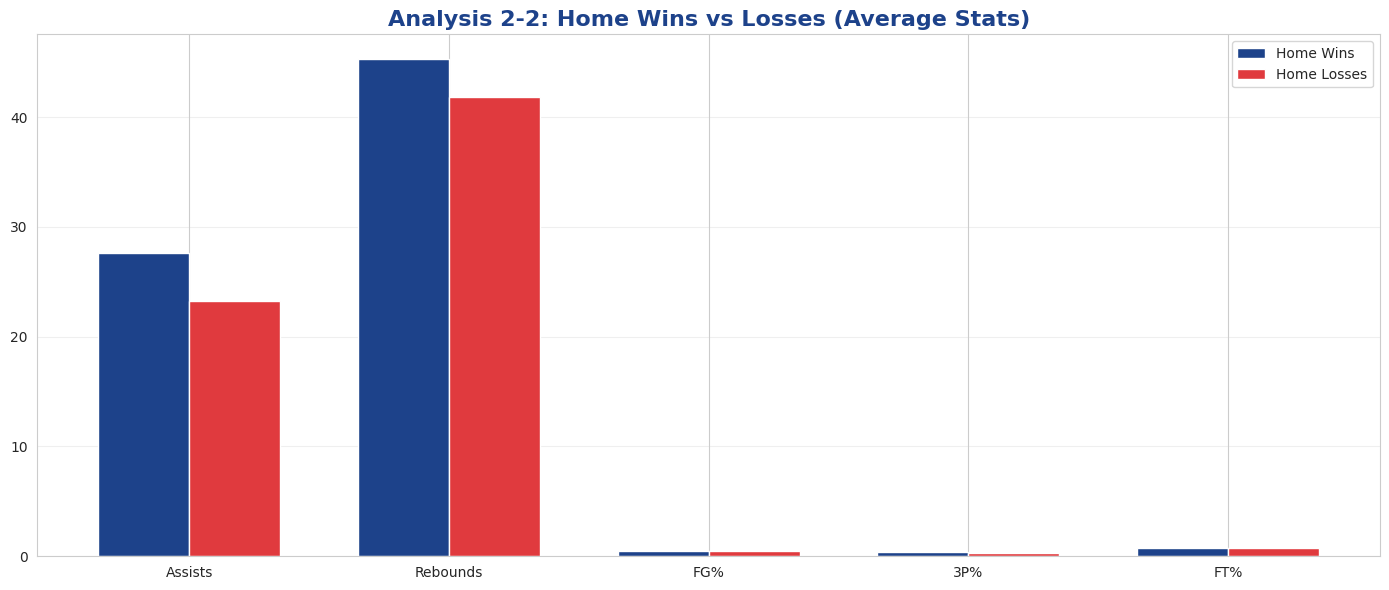

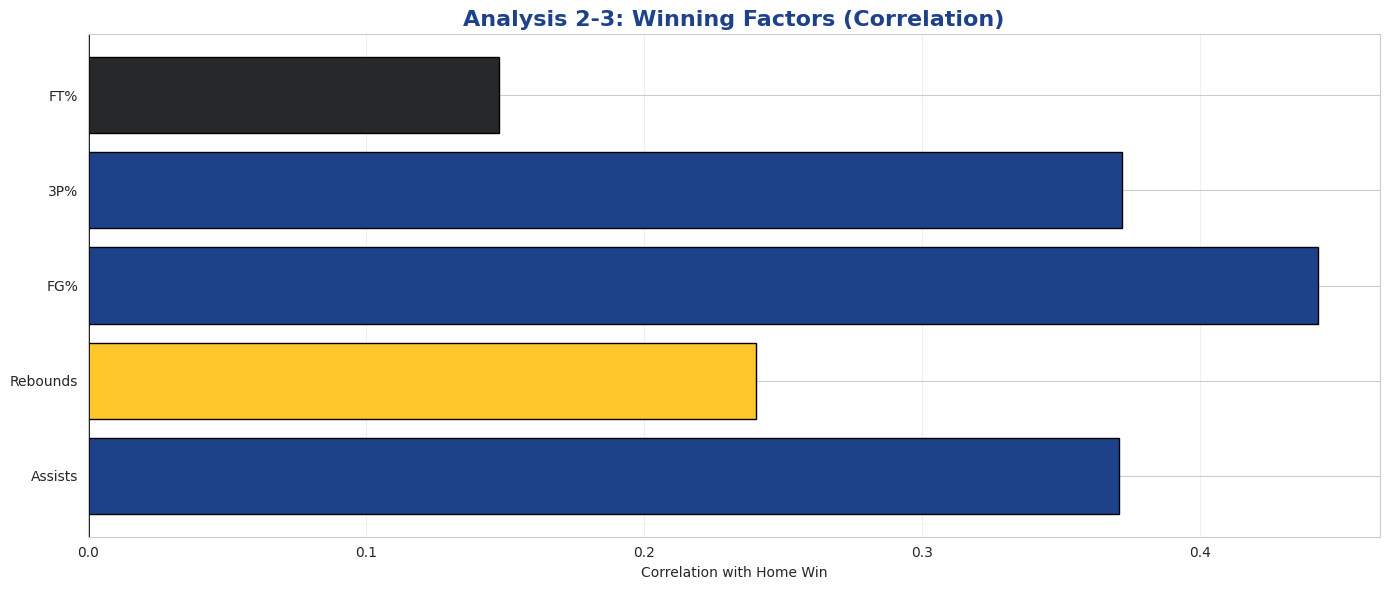

In [ ]:
# ======================================================
# Figure 1: 홈 vs 원정 승률 (파이 차트)
# ======================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

colors1 = [GSW_BLUE, '#E03A3E']
explode1 = (0.05, 0)

ax1.pie([home_w, home_l], labels=['Wins', 'Losses'],
        autopct='%1.1f%%', colors=colors1, explode=explode1,
        startangle=90, wedgeprops={'edgecolor':'white','linewidth':3})
ax1.set_title(f'Home Games\n{home_w}W - {home_l}L ({home_wr:.3f})',
              fontweight='bold', color=GSW_BLUE)

colors2 = [GSW_YELLOW, '#E03A3E']
ax2.pie([away_w, away_l], labels=['Wins', 'Losses'],
        autopct='%1.1f%%', colors=colors2, explode=explode1,
        startangle=90, wedgeprops={'edgecolor':'white','linewidth':3})
ax2.set_title(f'Road Games\n{away_w}W - {away_l}L ({away_wr:.3f})',
              fontweight='bold', color=GSW_BLUE)

plt.suptitle('Analysis 2-1: Home vs Road Performance',
             fontsize=18, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()


# ======================================================
# Figure 2: 홈 승/패 평균 스탯 비교
# ======================================================
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(stats_cols))
width = 0.35
labels = ['Assists', 'Rebounds', 'FG%', '3P%', 'FT%']

ax.bar(x - width/2, win_stats.values, width,
       label='Home Wins', color=GSW_BLUE)
ax.bar(x + width/2, loss_stats.values, width,
       label='Home Losses', color='#E03A3E')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Analysis 2-2: Home Wins vs Losses (Average Stats)',
             fontsize=16, fontweight='bold', color=GSW_BLUE)
ax.legend()
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


# ======================================================
# Figure 3: 홈 승리 요인 상관관계
# ======================================================
fig, ax = plt.subplots(figsize=(14, 6))

colors_corr = [
    GSW_BLUE if v > 0.25 else
    GSW_YELLOW if v > 0.15 else
    GSW_GRAY
    for v in correlations.values
]

ax.barh(correlations.index, correlations.values,
        color=colors_corr, edgecolor='black')

ax.axvline(0, color='black', linewidth=2)
ax.set_title('Analysis 2-3: Winning Factors (Correlation)',
             fontsize=16, fontweight='bold', color=GSW_BLUE)
ax.set_xlabel('Correlation with Home Win')
ax.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()
